In [1]:
import pandas as pd
import numpy as np
import random 
from datetime import datetime, timedelta

# Parameters for Gaussian noise
mean = 0  # Mean of the Gaussian distribution
std_dev = random.randint(5,25)  # Standard deviation of the Gaussian distribution

# Load dataset from CSV file
dataset = pd.read_csv('healthcare_dataset.csv')

# List of columns to exclude from noise addition
exclude_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']  # Exclude specified columns

# Function to add Gaussian noise to ASCII values
def add_noise_to_ascii(val, mean, std_dev):
    if isinstance(val, str):
        ascii_values = [ord(char) for char in val]
        noisy_ascii_values = []
        for value in ascii_values:
            noisy_value = int(np.round(value + np.random.normal(mean, std_dev)))
            if 65 <= noisy_value <= 90 or 97 <= noisy_value <= 122 or 48 <= noisy_value <= 57:
                noisy_ascii_values.append(noisy_value)
            else:
                noisy_ascii_values.append(value)  # Keep non-alphanumeric characters unchanged
        noisy_string = ''.join([chr(value) for value in noisy_ascii_values])
        return noisy_string
    return val

# Function to add Gaussian noise to Age column while keeping it between 0 and 100
def add_noise_to_age(val, mean, std_dev):
    noisy_val = int(np.round(val + np.random.normal(mean, std_dev)))
    return max(0, min(noisy_val, 100))  # Ensure age remains between 0 and 100

def add_noise_to_room(val, mean, std_dev):
    noisy_val = int(np.round(val + np.random.normal(mean, std_dev)))
    return noisy_val


# Function to add Gaussian noise to Billing Amount column while keeping it positive integer
def add_noise_to_billing_amount(val, mean, std_dev):
    std_dev = random.randint(1000,50000)
    noisy_val = int(np.round(val + np.random.normal(mean, std_dev)))
    return max(0, noisy_val)  # Ensure billing amount remains positive

# Apply the function to the entire DataFrame, excluding certain columns
for col in dataset.columns:
    if col not in exclude_columns:
        if col == 'Age':
            dataset[col] = dataset[col].apply(add_noise_to_age, args=(mean, std_dev))
        elif col == 'Billing Amount':
            dataset[col] = dataset[col].apply(add_noise_to_billing_amount, args=(mean, std_dev))
        elif col=="Room Number":
            dataset[col] = dataset[col].apply(add_noise_to_room , args = (mean, std_dev))
        else:
            dataset[col] = dataset[col].apply(add_noise_to_ascii, args=(mean, std_dev))

# Modify the 'Date of Admission' and 'Discharge Date' columns to have different dates
date_format = "%Y-%m-%d"  # Assuming the date format in the dataset is YYYY-MM-DD
start_date = datetime.strptime('2022-01-01', date_format)  # Start date for generating random dates
end_date = datetime.strptime('2023-12-31', date_format)  # End date for generating random dates

# Function to generate a random date within the specified range
def generate_random_date(start_date, end_date):
    return start_date + timedelta(days=random.randint(0, (end_date - start_date).days))

dataset['Date of Admission'] = dataset['Date of Admission'].apply(lambda x: generate_random_date(start_date, end_date).strftime(date_format))
dataset['Discharge Date'] = dataset['Discharge Date'].apply(lambda x: generate_random_date(start_date, end_date).strftime(date_format))

# Save the modified dataset to a CSV file
dataset.to_csv('modified_dataset2.csv', index=False)

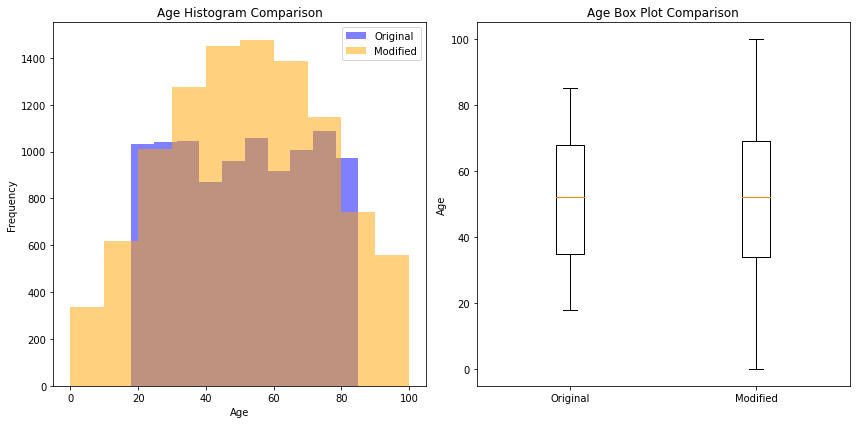

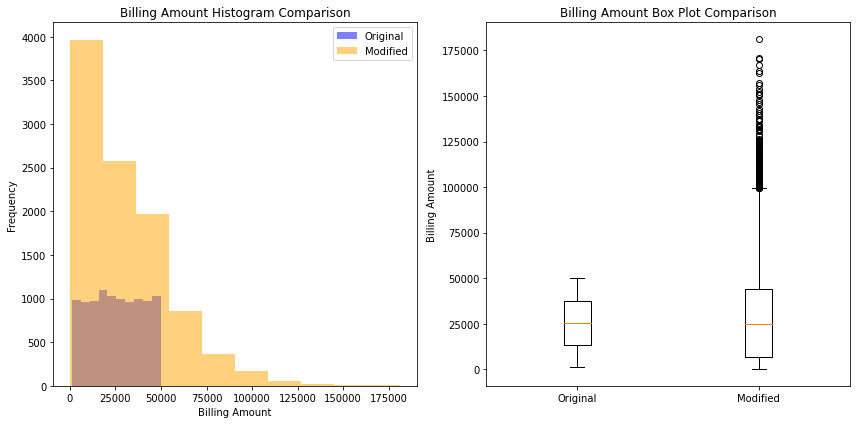

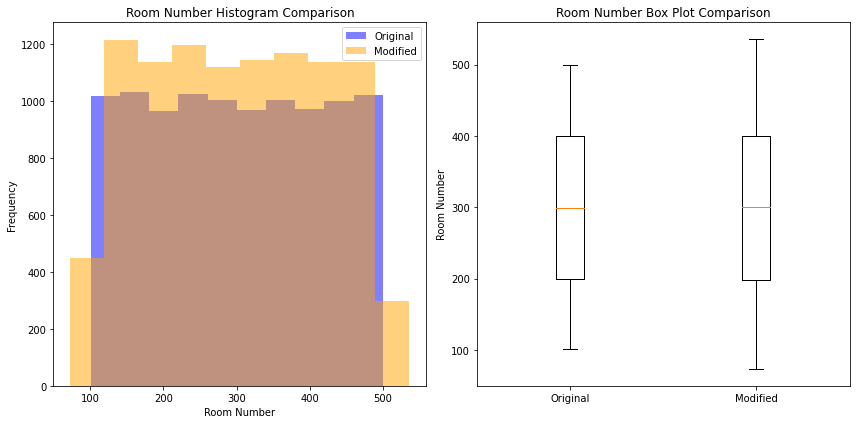

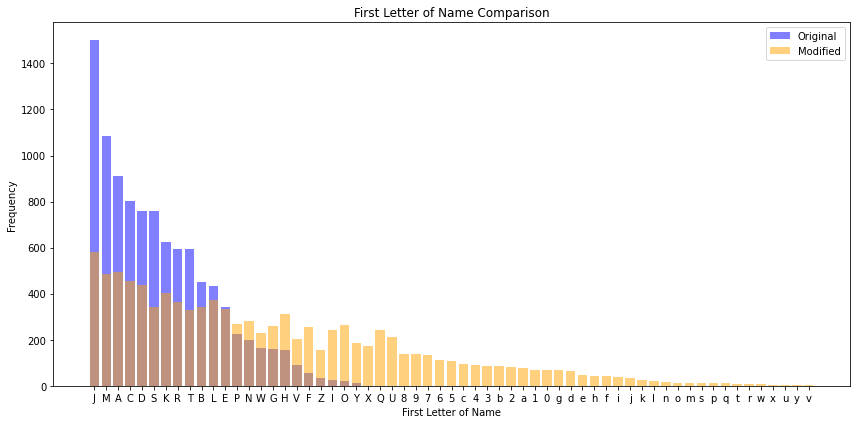

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Columns to compare
columns_to_compare = ['Age', 'Billing Amount', 'Room Number']  # Add more columns if needed

# Plotting
for col in columns_to_compare:
    plt.figure(figsize=(12, 6))
    
    # Histogram comparison
    plt.subplot(1, 2, 1)
    plt.hist(original_dataset[col], alpha=0.5, color='blue', label='Original')
    plt.hist(modified_dataset[col], alpha=0.5, color='orange', label='Modified')
    plt.title(f'{col} Histogram Comparison')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Box plot comparison
    plt.subplot(1, 2, 2)
    plt.boxplot([original_dataset[col], modified_dataset[col]], labels=['Original', 'Modified'])
    plt.title(f'{col} Box Plot Comparison')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Compare distribution of first letters of names
original_name_first_letter = original_dataset['Name'].str[0].value_counts()
modified_name_first_letter = modified_dataset['Name'].str[0].value_counts()

plt.figure(figsize=(12, 6))

# Bar plot comparison
plt.bar(original_name_first_letter.index, original_name_first_letter.values, alpha=0.5, color='blue', label='Original')
plt.bar(modified_name_first_letter.index, modified_name_first_letter.values, alpha=0.5, color='orange', label='Modified')
plt.title('First Letter of Name Comparison')
plt.xlabel('First Letter of Name')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Original Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000

Modified Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.484000    28985.915200    300.009800
std       23.516178    26020.265206    116.243692
min        0.000000        0.000000     73.000000
25%       34.000000     6588.750000    198.000000
50%       52.000000    24952.500000    300.000000
75%       69.000000    43793.750000    400.000000
max      100.000000   181327.000000    536.000000


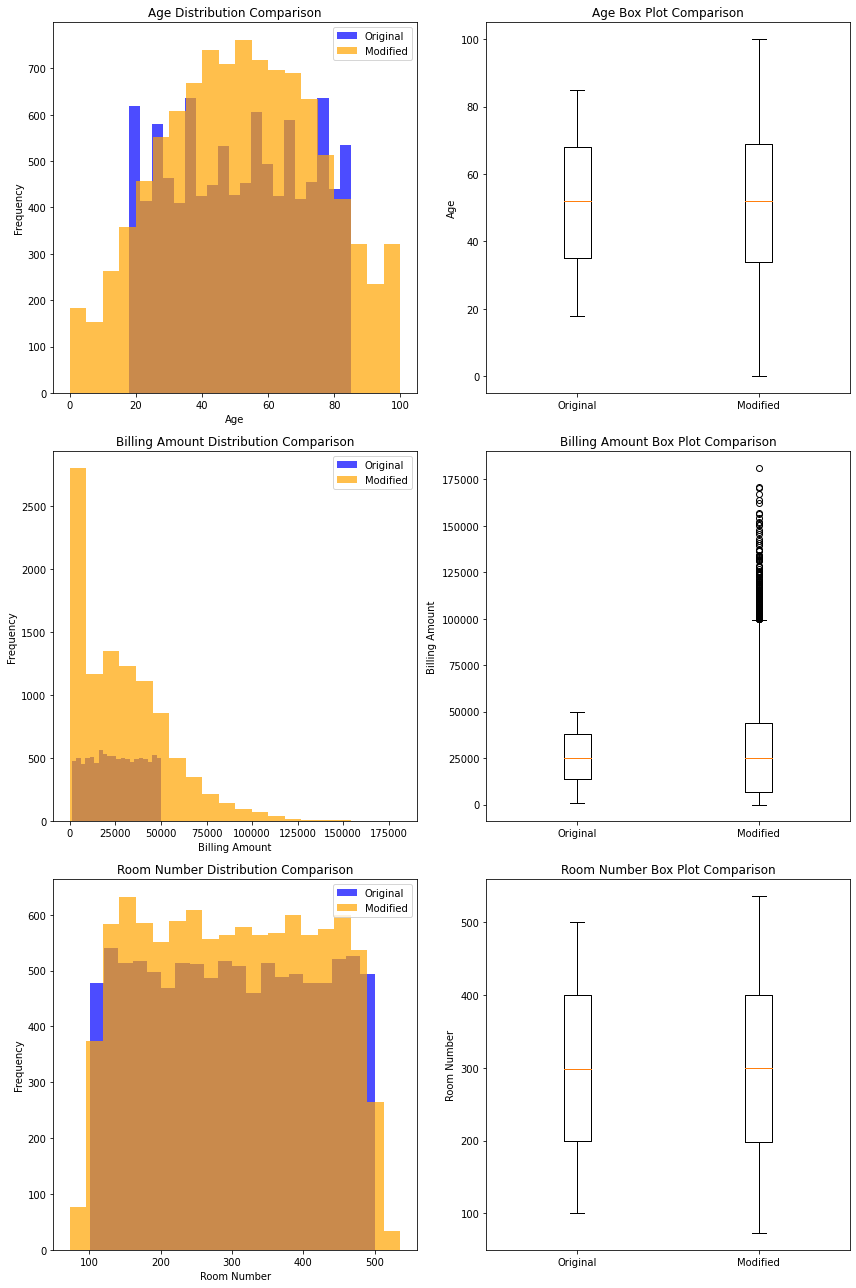


Differential Privacy Metrics:
Epsilon: 1
Sensitivity: 181327


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Summary statistics comparison
original_summary = original_dataset.describe()
modified_summary = modified_dataset.describe()

print("Original Dataset Summary:")
print(original_summary)
print("\nModified Dataset Summary:")
print(modified_summary)

# Plot histograms for numerical columns
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
plt.figure(figsize=(12, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    plt.hist(original_dataset[col], bins=20, color='blue', alpha=0.7, label='Original')
    plt.hist(modified_dataset[col], bins=20, color='orange', alpha=0.7, label='Modified')
    plt.title(f'{col} Distribution Comparison')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(len(numerical_columns), 2, i*2)
    plt.boxplot([original_dataset[col], modified_dataset[col]], labels=['Original', 'Modified'])
    plt.title(f'{col} Box Plot Comparison')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Calculate differential privacy metrics
epsilon = 1  # Adjust epsilon as needed
sensitivity = modified_dataset[numerical_columns].max().max() - modified_dataset[numerical_columns].min().min()

print(f"\nDifferential Privacy Metrics:")
print(f"Epsilon: {epsilon}")
print(f"Sensitivity: {sensitivity}")


Original Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000

Modified Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.484000    28985.915200    300.009800
std       23.516178    26020.265206    116.243692
min        0.000000        0.000000     73.000000
25%       34.000000     6588.750000    198.000000
50%       52.000000    24952.500000    300.000000
75%       69.000000    43793.750000    400.000000
max      100.000000   181327.000000    536.000000


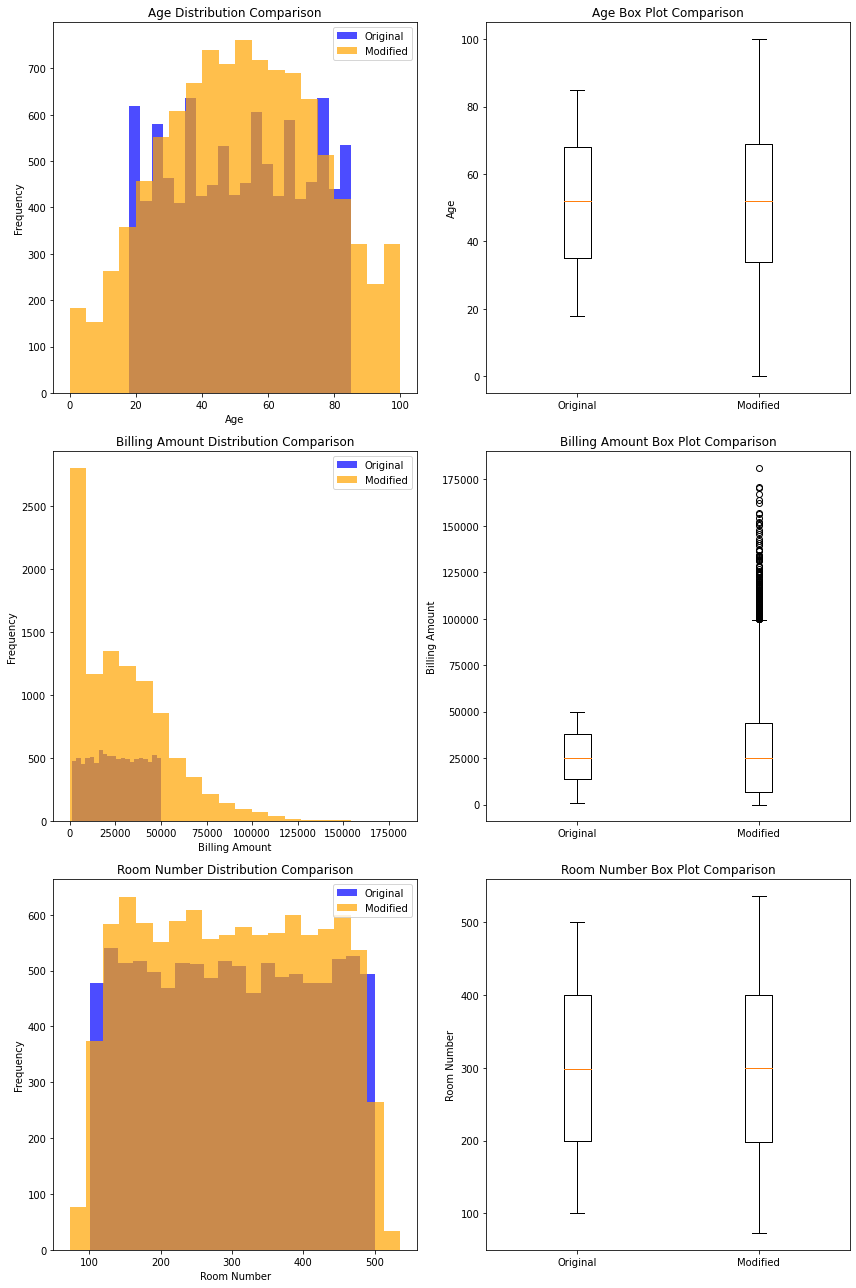


Differential Privacy Metrics:
Epsilon: 1
Sensitivity: 181327

Additional Analysis for Differential Privacy:

Column: Age
Max Value: 100
Min Value: 0
Sensitivity: 100

Column: Billing Amount
Max Value: 181327
Min Value: 0
Sensitivity: 181327

Column: Room Number
Max Value: 536
Min Value: 73
Sensitivity: 463


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Summary statistics comparison
original_summary = original_dataset.describe()
modified_summary = modified_dataset.describe()

print("Original Dataset Summary:")
print(original_summary)
print("\nModified Dataset Summary:")
print(modified_summary)

# Plot histograms for numerical columns
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
plt.figure(figsize=(12, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    plt.hist(original_dataset[col], bins=20, color='blue', alpha=0.7, label='Original')
    plt.hist(modified_dataset[col], bins=20, color='orange', alpha=0.7, label='Modified')
    plt.title(f'{col} Distribution Comparison')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(len(numerical_columns), 2, i*2)
    plt.boxplot([original_dataset[col], modified_dataset[col]], labels=['Original', 'Modified'])
    plt.title(f'{col} Box Plot Comparison')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Calculate differential privacy metrics
epsilon = 1  # Adjust epsilon as needed
sensitivity = modified_dataset[numerical_columns].max().max() - modified_dataset[numerical_columns].min().min()

print(f"\nDifferential Privacy Metrics:")
print(f"Epsilon: {epsilon}")
print(f"Sensitivity: {sensitivity}")

# Additional analysis for differential privacy
print("\nAdditional Analysis for Differential Privacy:")
for col in numerical_columns:
    sensitivity_col = modified_dataset[col].max() - modified_dataset[col].min()
    print(f"\nColumn: {col}")
    print(f"Max Value: {modified_dataset[col].max()}")
    print(f"Min Value: {modified_dataset[col].min()}")
    print(f"Sensitivity: {sensitivity_col}")

# You may also include other relevant statistical analysis, such as comparing means, medians, etc.


Original Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000

Modified Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.484000    28985.915200    300.009800
std       23.516178    26020.265206    116.243692
min        0.000000        0.000000     73.000000
25%       34.000000     6588.750000    198.000000
50%       52.000000    24952.500000    300.000000
75%       69.000000    43793.750000    400.000000
max      100.000000   181327.000000    536.000000


<ipython-input-2-59cec2e01111>:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[original_dataset[col], modified_dataset[col]], palette=['blue', 'orange'])
<ipython-input-2-59cec2e01111>:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[original_dataset[col], modified_dataset[col]], palette=['blue', 'orange'])
<ipython-input-2-59cec2e01111>:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[original_dataset[col], modified_dataset[col]], palette=['blue', 'orange'])


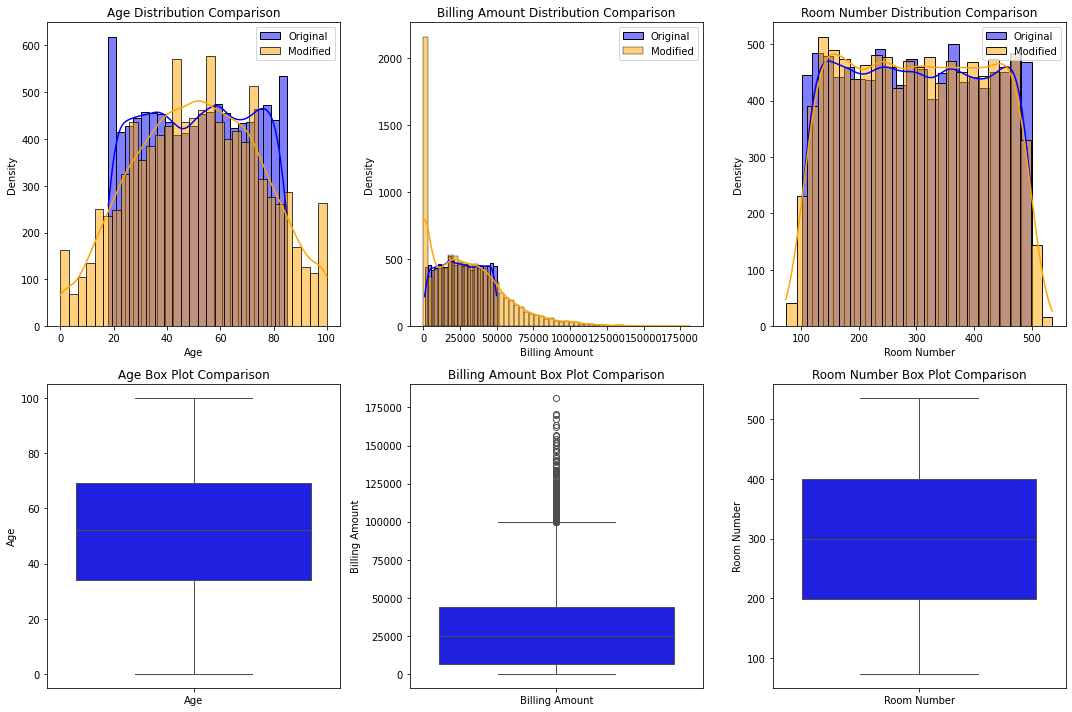


Statistical Tests for Distribution Comparison:

Column: Age
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.0809
    - p-value: 7.040783648697654e-29

Column: Billing Amount
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.1917
    - p-value: 5.2310558662382095e-161

Column: Room Number
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.0133
    - p-value: 0.3393633805365633

Differential Privacy Metrics:
Epsilon: 1
Sensitivity: 181327

Additional Analysis for Differential Privacy:

Column: Age
Max Value: 100
Min Value: 0
Sensitivity: 100

Column: Billing Amount
Max Value: 181327
Min Value: 0
Sensitivity: 181327

Column: Room Number
Max Value: 536
Min Value: 73
Sensitivity: 463


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Summary statistics comparison
original_summary = original_dataset.describe()
modified_summary = modified_dataset.describe()

print("Original Dataset Summary:")
print(original_summary)
print("\nModified Dataset Summary:")
print(modified_summary)

# Visualize distributions of numerical columns
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.histplot(original_dataset[col], kde=True, color='blue', label='Original')
    sns.histplot(modified_dataset[col], kde=True, color='orange', label='Modified')
    plt.title(f'{col} Distribution Comparison')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(2, len(numerical_columns), i+len(numerical_columns))
    sns.boxplot(data=[original_dataset[col], modified_dataset[col]], palette=['blue', 'orange'])
    plt.title(f'{col} Box Plot Comparison')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Perform statistical tests to compare distributions
print("\nStatistical Tests for Distribution Comparison:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    t_stat, p_value = stats.ks_2samp(original_dataset[col], modified_dataset[col])
    print(f"Kolmogorov-Smirnov Test (KS Test):")
    print(f"    - Test Statistic: {t_stat}")
    print(f"    - p-value: {p_value}")

# Calculate differential privacy metrics
epsilon = 1  # Placeholder value for epsilon, adjust as needed
sensitivity = modified_dataset[numerical_columns].max().max() - modified_dataset[numerical_columns].min().min()

print(f"\nDifferential Privacy Metrics:")
print(f"Epsilon: {epsilon}")
print(f"Sensitivity: {sensitivity}")

# Additional analysis for differential privacy
print("\nAdditional Analysis for Differential Privacy:")
for col in numerical_columns:
    sensitivity_col = modified_dataset[col].max() - modified_dataset[col].min()
    print(f"\nColumn: {col}")
    print(f"Max Value: {modified_dataset[col].max()}")
    print(f"Min Value: {modified_dataset[col].min()}")
    print(f"Sensitivity: {sensitivity_col}")

# Statistical tests and additional analysis for differential privacy can be further expanded based on specific requirements and hypotheses.


Original Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000

Modified Dataset Summary:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.484000    28985.915200    300.009800
std       23.516178    26020.265206    116.243692
min        0.000000        0.000000     73.000000
25%       34.000000     6588.750000    198.000000
50%       52.000000    24952.500000    300.000000
75%       69.000000    43793.750000    400.000000
max      100.000000   181327.000000    536.000000


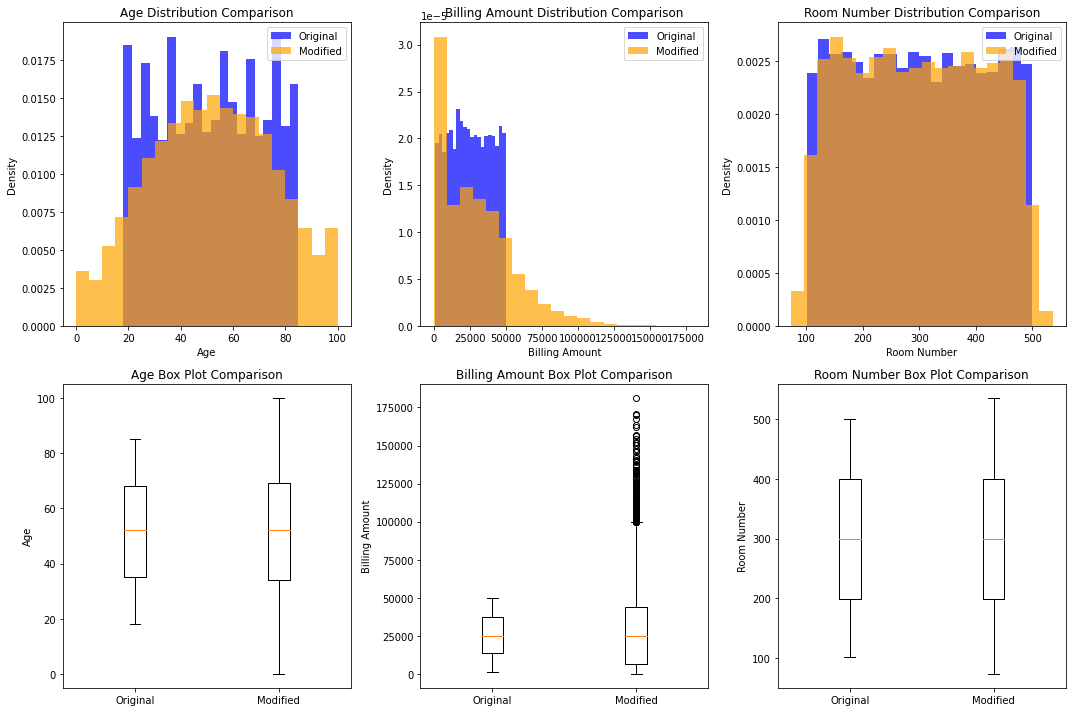


Statistical Tests for Distribution Comparison:

Column: Age
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.0809
    - p-value: 7.040783648697654e-29

Column: Billing Amount
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.1917
    - p-value: 5.2310558662382095e-161

Column: Room Number
Kolmogorov-Smirnov Test (KS Test):
    - Test Statistic: 0.0133
    - p-value: 0.3393633805365633

Differential Privacy Metrics:
Epsilon: 1
Sensitivity: 181327

Additional Analysis for Differential Privacy:

Column: Age
Max Value: 100
Min Value: 0
Sensitivity: 100

Column: Billing Amount
Max Value: 181327
Min Value: 0
Sensitivity: 181327

Column: Room Number
Max Value: 536
Min Value: 73
Sensitivity: 463


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Summary statistics comparison
original_summary = original_dataset.describe()
modified_summary = modified_dataset.describe()

print("Original Dataset Summary:")
print(original_summary)
print("\nModified Dataset Summary:")
print(modified_summary)

# Visualize distributions of numerical columns
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    plt.hist(original_dataset[col], bins=20, color='blue', alpha=0.7, label='Original', density=True)
    plt.hist(modified_dataset[col], bins=20, color='orange', alpha=0.7, label='Modified', density=True)
    plt.title(f'{col} Distribution Comparison')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(2, len(numerical_columns), i+len(numerical_columns))
    plt.boxplot([original_dataset[col], modified_dataset[col]], labels=['Original', 'Modified'])
    plt.title(f'{col} Box Plot Comparison')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Perform statistical tests to compare distributions
print("\nStatistical Tests for Distribution Comparison:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    t_stat, p_value = stats.ks_2samp(original_dataset[col], modified_dataset[col])
    print(f"Kolmogorov-Smirnov Test (KS Test):")
    print(f"    - Test Statistic: {t_stat}")
    print(f"    - p-value: {p_value}")

# Calculate differential privacy metrics
epsilon = 1  # Placeholder value for epsilon, adjust as needed
sensitivity = modified_dataset[numerical_columns].max().max() - modified_dataset[numerical_columns].min().min()

print(f"\nDifferential Privacy Metrics:")
print(f"Epsilon: {epsilon}")
print(f"Sensitivity: {sensitivity}")

# Additional analysis for differential privacy
print("\nAdditional Analysis for Differential Privacy:")
for col in numerical_columns:
    sensitivity_col = modified_dataset[col].max() - modified_dataset[col].min()
    print(f"\nColumn: {col}")
    print(f"Max Value: {modified_dataset[col].max()}")
    print(f"Min Value: {modified_dataset[col].min()}")
    print(f"Sensitivity: {sensitivity_col}")

# Statistical tests and additional analysis for differential privacy can be further expanded based on specific requirements and hypotheses.


Sensitivity:
Age: 55
Billing Amount: 160658.24517725877
Room Number: 55

Privacy Budget (Epsilon): 1

Statistical Tests:
Age:
  - KS Test Statistic: 0.0809
  - p-value: 7.040783648697654e-29
Billing Amount:
  - KS Test Statistic: 0.1917
  - p-value: 5.2310558662382095e-161
Room Number:
  - KS Test Statistic: 0.0133
  - p-value: 0.3393633805365633


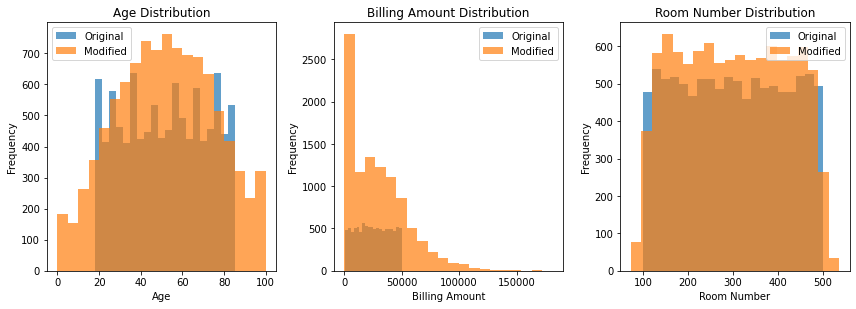

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Load original and modified datasets
original_dataset = pd.read_csv('healthcare_dataset.csv')
modified_dataset = pd.read_csv('modified_dataset2.csv')

# Compute sensitivity for numerical columns
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
sensitivity = {}
for col in numerical_columns:
    sensitivity[col] = max(abs(original_dataset[col] - modified_dataset[col]))

# Set privacy budget (epsilon)
epsilon = 1  # Example value, adjust as needed

# Perform statistical tests
statistical_tests = {}
for col in numerical_columns:
    t_stat, p_value = stats.ks_2samp(original_dataset[col], modified_dataset[col])
    statistical_tests[col] = {'KS Test Statistic': t_stat, 'p-value': p_value}

# Visualize distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    plt.hist(original_dataset[col], bins=20, alpha=0.7, label='Original')
    plt.hist(modified_dataset[col], bins=20, alpha=0.7, label='Modified')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

# Additional analysis as needed

# Print results
print("Sensitivity:")
for col, value in sensitivity.items():
    print(f"{col}: {value}")

print("\nPrivacy Budget (Epsilon):", epsilon)

print("\nStatistical Tests:")
for col, result in statistical_tests.items():
    print(f"{col}:")
    for test, val in result.items():
        print(f"  - {test}: {val}")

plt.tight_layout()
plt.show()
